# 퍼셉트론 (perceptron)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 활성화 함수

In [2]:
def plot_activation(activation):
    # -1 부터 1까지 100개의 점을 찍어보자.
    x = np.linspace(-10, 10, 1000)
    
    # 스텝 함수 통과한 값
    line = [activation(_x) for _x in x]

    plt.figure(figsize=(3, 1.5), dpi=160)
    plt.plot(x, line, color='k')
    plt.axvline(0, linestyle=':', linewidth=.9, color='orange')
    plt.axhline(0, linestyle=':', linewidth=.9, color='orange')
    plt.show()

### 스텝 함수 (step function)

$$
f(x) = 
\begin{cases}
1 \mbox{ if } x > 0\\
0 \mbox{ otherwise}
\end{cases}
$$

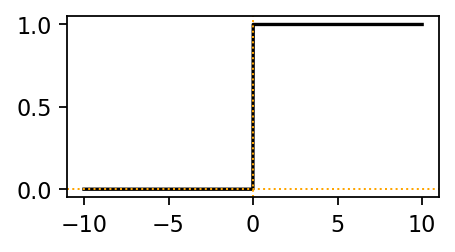

In [3]:
# 값이 0보다 크면 1, 아니면 무조건 0인 step function
step = lambda x: 1 if x > 0 else 0

plot_activation(step)

### 시그모이드 / 로지스틱 함수

$$
f(x) = {1\over 1 + e^{-x}}
$$

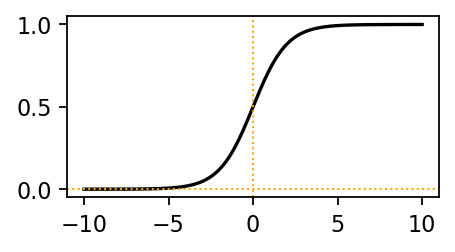

In [4]:
sigmoid = lambda x : 1 / (1 + np.e ** (-x))

plot_activation(sigmoid)

### 하이퍼볼릭 탄젠트
$$
f(x) = tanh(x)
$$

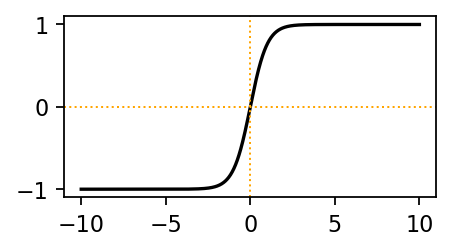

In [5]:
plot_activation(np.tanh)

### ReLU (Rectified Linear Unit) / Leaky ReLU
* ReLU
$$
f(x) = \max(0, x)
$$
* Leaky ReLU
$$
f(x) = \max(0.1x, x)
$$

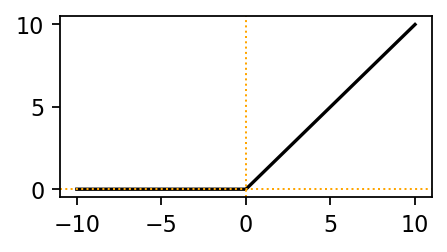

In [6]:
relu = lambda x : x if x > 0 else 0

plot_activation(relu)

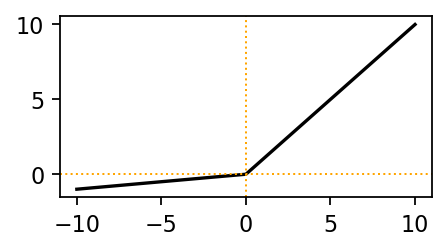

In [7]:
leaky_relu = lambda x : x if x > 0 else .1 * x

plot_activation(leaky_relu)

## ELU (Exponential Linear Unit)
$$
f(x) = 
\begin{cases}
x \mbox{ if } x\ge 0\\
\alpha(e^x - 1) \mbox{ } x<0
\end{cases}
$$

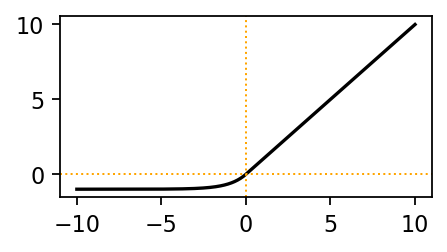

In [8]:
alpha = 1.
elu = lambda x : x if x >=0 else alpha * (np.e ** x - 1)

plot_activation(elu)

## Swish

$$
f(x) = { x \over 1 + e^{-x}}
$$

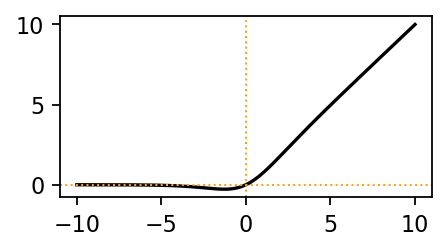

In [9]:
swish = lambda x : x / (1 + np.e**(-x))

plot_activation(swish)

### Softmax

* 어떤 벡터의 원소 합이 1이 되도록 변환해줌
* 즉, 각각의 원소 크기에 따라 확률처럼 바꾸어줌
$$
\sigma(z)_i = {e^{z_i} \over \sum_j^N e^{z_j}}
$$

이 때, $i$는 원소의 번호, $j$는 모든 원소의 인덱스 번호

세 가지 클래스에 관해 예측하는 모델이 아래와 같은 로짓 결과가 나타났다면,

In [10]:
# 합이 1이 아님
# 0번 클래스가 0.001, 1번 클래스가 0.5, 3번 클래스가 1이라는 점수를 각각 얻은 것
y1 = [0.001, 0.5, 1]

소프트맥스에 통과시켜 확률로 나타낼 수 있음

In [11]:
def softmax(X):
    # 분모. 모든 원소의 합
    _sum = 0.
    for x in X:
        _sum += np.e ** x
        
    # 분자 만들자 마자 바로 리턴하기
    return [np.e ** x / _sum for x in X]

In [12]:
prob = softmax(y1)
prob

[0.18647537797709654, 0.3071386298822855, 0.5063859921406181]

## 단층 퍼셉트론

* Rosenblatt의 퍼셉트론 알고리즘

1. weight를 0 또는 무작위 수로 초기화
2. 각각의 데이터 샘플 $x^{(i)}$ 에 대해
  1. 출력 값 계산
  2. weight 업데이트

* 모델 가중치 갱신 방법

weight ($W$) 업데이트는 아래 방법을 따라 이루어짐

$W = [w_1, \cdots, w_n]$ 일 때,

$w_j \leftarrow w_j + \Delta w_j$

이 때, $\Delta w_j$ 는

$\Delta w_j = \eta \big( \mbox{target}^{(i)} - \mbox{output}^{(i)} \big) x_j^{(i)}$

이고, $\eta$는 학습률 (0.0 에서 1.0 사이값)

"target"은 맞추고자 하는 실제 클래스이고, "output"은 모델이 예측한 값이 됨

* 모델의 가중치는 한 방에 모두 업데이트 됨

AND 와 OR 연산 결과를 예측하는 퍼셉트론의 가중치 W는 2차원이므로

$\Delta w_0 = \eta \big( \mbox{target}^{(i)} - \mbox{output}^{(i)} \big) x_0^{(i)}$

$\Delta w_1 = \eta \big( \mbox{target}^{(i)} - \mbox{output}^{(i)} \big) x_1^{(i)}$

바이어스도 업데이트 되므로

$\Delta b_j = \eta \big( \mbox{target}^{(i)} - \mbox{output}^{(i)} \big)$

이 세 가지 모델 파라미터가 동시에 업데이트 된다.

* AND 연산에 관한 단층 퍼셉트론 예시
| |$x_0$|$x_1$|$y$|
|---|---|---|---|
|$X_0$|0|0|0|
|$X_1$|0|1|0|
|$X_2$|1|0|0|
|$X_3$|1|1|1|

데이터가 $X_0$ 부터 $X_3$ 까지 총 네 개 주어지고, 각각의 레코드는 2차원(원소 $x_0$과 $x_1$)으로 이루어짐

이 때, 단층 퍼셉트론은 아래 손실함수를 최소화하는 모델 파라미터 $W$ 와 $b$를 찾기

$$
\mbox{minimize } (y - W^T\cdot X + b)^2
$$

(풀이) 로젠블랏의 퍼셉트론 알고리즘에 따라서 하나씩 진행하자.

먼저 $W$, $b$를 아래 값으로 초기화해보자. 그러면

$W = [0.5, 0,5]$, $b = 0.3$

그리고 $\eta = 0.5$ 라고 하자.

(아래 코드는 손으로 계산하기 귀찮아서 만들어둔 것이니 출력 결과만 보기)

In [13]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0, 0, 0, 1]

In [14]:
# 초기화
W = np.array([0.5, 0.5])
b = .3

# 학습률
eta = .5

In [15]:
get_output = lambda x: np.matmul(W, x) + b if np.matmul(W, x) + b > 0 else 0

In [16]:
def update(W, b, x, target, show):
    # x0에 대해서
    output = get_output(x)
    if show:
        print('x:',x[0], x[1])
        print(f"target: {target}, output: {output:.2f}, ")
    
    _W = np.array(W)
    _b = float(b)
    
    for i in range(2):
        _W[i] = _W[i] + eta * (target - output) * x[i]
        if show:
            print(f"w{i}: {_W[i] + eta * (target - output) * x[i]:.2f} = {_W[i]:.2f} + {eta} * ({target} - {output:.2f}) * {x[i]}")
    
    _b = _b + eta * (target - output)
    if show:
        print(f"b: {_b + eta * (target - output):.2f} = {_b:.2f} + {eta} * ({target} - {output:.2f})")
    return _W, _b

In [17]:
for e in range(10):
    if (e+1) % 1 == 0:
        print("="*80)
        print(f"{e+1} epoch")
        show = True
    for i in range(len(X)):
        W, b = update(W, b, X[i], y[i], show)
        if show:
            print(f"{W[0]:.2f}, {W[1]:.2f}")
            print(f"{b:.2f}")
            print("="*30)
    show = False

1 epoch
x: 0 0
target: 0, output: 0.30, 
w0: 0.50 = 0.50 + 0.5 * (0 - 0.30) * 0
w1: 0.50 = 0.50 + 0.5 * (0 - 0.30) * 0
b: 0.00 = 0.15 + 0.5 * (0 - 0.30)
0.50, 0.50
0.15
x: 0 1
target: 0, output: 0.65, 
w0: 0.50 = 0.50 + 0.5 * (0 - 0.65) * 0
w1: -0.15 = 0.17 + 0.5 * (0 - 0.65) * 1
b: -0.50 = -0.18 + 0.5 * (0 - 0.65)
0.50, 0.17
-0.18
x: 1 0
target: 0, output: 0.32, 
w0: 0.18 = 0.34 + 0.5 * (0 - 0.32) * 1
w1: 0.17 = 0.17 + 0.5 * (0 - 0.32) * 0
b: -0.50 = -0.34 + 0.5 * (0 - 0.32)
0.34, 0.17
-0.34
x: 1 1
target: 1, output: 0.17, 
w0: 1.16 = 0.75 + 0.5 * (1 - 0.17) * 1
w1: 1.00 = 0.59 + 0.5 * (1 - 0.17) * 1
b: 0.49 = 0.08 + 0.5 * (1 - 0.17)
0.75, 0.59
0.08
2 epoch
x: 0 0
target: 0, output: 0.08, 
w0: 0.75 = 0.75 + 0.5 * (0 - 0.08) * 0
w1: 0.59 = 0.59 + 0.5 * (0 - 0.08) * 0
b: 0.00 = 0.04 + 0.5 * (0 - 0.08)
0.75, 0.59
0.04
x: 0 1
target: 0, output: 0.62, 
w0: 0.75 = 0.75 + 0.5 * (0 - 0.62) * 0
w1: -0.04 = 0.28 + 0.5 * (0 - 0.62) * 1
b: -0.59 = -0.28 + 0.5 * (0 - 0.62)
0.75, 0.28
-0.28
x: 1 0


## 다층 퍼셉트론

다층 퍼셉트론은 아래와 같은 손실함수를 최소화하는 $W$, $b$를 찾는 것과 같음

$$
\mbox{minimize } \big(y - g(W_2^T \cdot f(W_1^T \cdot X + b_1) + b_2)\big)^2
$$

$W_2$, $b_2$ 는 은닉층의 가중치와 바이어스

이 때, 모델 파라미터 $W$, $b$는 로젠블랏의 단층 퍼셉트론과 달리 역전파(backpropagation) 방법을 써서 업데이트 한다.

실제 맞춰야하는 target과 모델의 예측값인 target의 차이를 $E$ (error)라고 할 때,

$$
W \leftarrow W - \eta {\partial E \over \partial W}
$$

이 때, $\eta$는 학습률

### 역전파 (backpropagation)

가중치 업데이트를 위해 미분 과정을 한 단계씩 살펴보자.

최적화 문제에서는 실제 값과 모델이 예측한 값의 차이(error)를 최소화하는 것이 목표다.

즉, 아래 에러를 최소하하는 것이 목표다.

$$
E = \sum_{i=1}^N \big( y_i -\hat{y}_i \big)^2
$$

$W$ 와 $b$ 를 업데이트 하기 위해서는 $W$와 $b$로 각각 미분한 다음 위 업데이트 식에 넣으면 된다.

하지만 처음부터 이것들로 미분하지 말고 모델의 가장 뒷쪽 부터 체인룰을 써서 하나씩 미분해서 깊이 들어가보자(backpropagation).

다층 레이어이므로 맨 뒷 쪽의 $\hat{y}$ 로 먼저 미분한다.

$$
\begin{align}
{\partial E \over \partial \hat{y}_k} & = {\partial \over \partial \hat{y}_k} \sum_{i=1}^N \big( y_i - \hat{y}_i\big)^2\\
& = {\partial \over \partial \hat{y}_k} \big( y_k - \hat{y}_k \big)^2\\
& = -2 \big( y_k - \hat{y}_k \big)
\end{align}
$$

$\hat{y}$가 나오기 위한 활성 함수(activation function)를 $z$라고 하자. $E$를 $z$에 관해 미분하려면, 체인룰을 쓴다. 여기서 최종 출력값에 가까운 레이어를 $(l)$ 번째 레이어, 입력 값에 가까운 쪽 레이어를 $(0)$ 번째 레이어라고 하자.

$$
\begin{align}
{\partial E \over \partial z_i^{(l)}} & = { \partial E \over \hat{y}_i} { \partial \hat{y}_i \over z_i^{(l)} } = -2 \big( y_i - \hat{y}_i \big) \sigma' \big( z_i^{(l)} \big)
\end{align}
$$

이 때, $\sigma (\cdot)$ 은 시그모이드 함수, $\sigma'$ 는 1차 미분한 것

활성 함수를 거쳤으면, 더 들어가서 이제 모델 파라미터 $W$에 관해 미분해보자.

$$
\begin{align}
{\partial E \over \partial w_{j,i}^{(l)}} & = {\partial E \over \partial z_i^{(l)}} {\partial z_i^{(l)}\over w_{j,i}^{(l)}}\\
& = {\partial E \over \partial z_i^{(l)}} {\partial \over \partial w_{j,i}^{(l)}} 
\bigg( \sum_{k=1}^M w_{k,i} z^{(l-1)}_{k} + b_i \bigg)
\end{align}
$$

여기서 얻은 $w_{j,i}^{(l)}$ 에 관한 미분값을 바탕으로 가중치를 업데이트한다.

위와 같은 미분 과정을 이전 층으로 점점 되돌아가며 진행한다.

$
z^{(l)} \rightarrow w^{(l)} 
\rightarrow z^{(l-1)} \rightarrow w^{(l-1)}
\cdots
\rightarrow z^{(0)} \rightarrow w^{(0)}
$

그러면 결국 입력층 가중치의 미분값은

$$
\begin{align}
{\partial E \over \partial w_{j,i}^{(0)}} & = {\partial E \over \partial z_i^{(l)}} \cdots {\partial z_i^{(l)}\over w_{j,i}^{(0)}}\\
& = {\partial E \over \partial z_i^{(l)}} \cdots {\partial \over \partial w_{j,i}^{(0)}} 
\bigg( \sum_{k=1}^L w_{k,i}^{(0)} x_{k} + b_i \bigg)
\end{align}
$$

이런 방식으로 출력값에서 입력값으로 되돌아가며 미분하고, 가중치 업데이트하는 것을 역전파(backpropagation)라고 한다.

좀 더 깊은 이해를 위해 아래 설명을 살펴보자.

다층 퍼셉트론에서 모델 파라미터 업데이트를 위해서는 출력값을 얻어내는 forward step과 가중치 업데이트하는 backpropagation 으로 나뉜다.

이 때, backpropagation 은 출력값으로부터 마지막 층의 가중치를 업데이트하는 스텝 1과 은닉층과 은닉층 사이의 가중치를 업데이트하는 스텝 2로 나뉜다.

아래 구현 코드를 통해 구체적인 과정을 알아보자. (궁금한 사람만)

initial W0:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]]
initial b0:
 [0.43758721 0.891773   0.96366276]
initial W1
 [0.38344152 0.79172504 0.52889492]
initial b1:
 0.5680445610939323

trained W0:
 [[2.13771123 2.20394503]
 [2.08672946 2.01742578]
 [1.96816686 2.06111936]]
trained b0:
 [-0.46833073 -0.4022135  -0.38212325]
trained W1
 [4.81873296 3.95977241 3.34763351]
trained b1:
 -7.1551567887324685

0, 0.1
1, 1.0
1, 1.0
1, 1.0



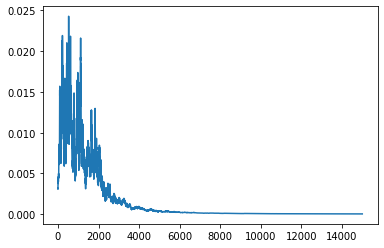

In [18]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

eta = 0.1
np.random.seed(0)
W0 = np.random.rand(3, 2)
b0 = np.random.rand(3)
W1 = np.random.rand(3)
b1 = np.random.rand()

print('initial W0:\n', W0)
print('initial b0:\n', b0)
print('initial W1\n', W1)
print('initial b1:\n', b1)
print()

sigmoid = lambda x: 1 / (1 + np.exp(-x))

def MLP(x):
    '''
        feedforward
    '''
    # np.matmul() 은 행렬곱
    z0 = sigmoid(np.matmul(W0, x) + b0)
    z1 = sigmoid(np.matmul(W1, z0) + b1)
    
    return z0, z1
    
def update(x, y):
    global W1, b1, W0, b0
    z0, z1 = MLP(x)
    # 히든 레이어(출력과 가까운 레이어)의 가중치(weight W1)에 관해 미분
    dW1 = -2 * (y - z1) * z1 * (1 - z1) * z0
    db1 = -2 * (y - z1) * z1 * (1 - z1) * 1
    
    # 위에서 구한 W1에 관한 미분에 체인룰 써서 W0에 관해 미분
    dW0 = np.zeros(W0.shape)
    db0 = np.zeros(b0.shape)
    for i in range(W0.shape[0]):
        for j in range(len(x)):
            dW0[i][j] = dW1[i] * (1-z0[i]) * z0[i] * x[j]
        db0[i] = dW1[i] * (1-z0[i]) * z0[i] * 1

    # 업데이트 룰에 따라 가중치 업데이트
    W1 -= eta * dW1
    b1 -= eta * db1
    W0 -= eta * dW0
    b0 -= eta * db0

loss = []
for e in range(15000):
    _loss = 0.
    # 랜덤하게 
    idx = np.random.randint(4)
    update(X[idx], y[idx])
    _loss += (MLP(X[i])[1] - y[i])**2
    _loss /= 4
    loss.append(_loss)

print('trained W0:\n', W0)
print('trained b0:\n', b0)
print('trained W1\n', W1)
print('trained b1:\n', b1)
print()

for i in range(4):
    y_hat = MLP(X[i])
    print(f"{y[i]}, {y_hat[1]:.1f}")
print()

plt.plot(loss)
plt.show()